Activity 3, Based on Regression threes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Mov = pd.read_csv("D:\\Nueva carpeta - copia (2)\\Udemy\\Python Udemy\\Data Files\\3. ST Academy - Decision Trees resource files\\Movie_regression.csv", header = 0)
Mov.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [3]:
Mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

As we're seeing we have some missin values in Time_taken values, so we going to do the treatment through the mean values to complete the missing data

In [4]:
Mov["Time_taken"].mean()

157.39149797570855

In [5]:
Mov["Time_taken"].fillna(value = Mov["Time_taken"].mean(), inplace = True)
Mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

Now we going to create a dummy varaible to maintain all dataframe as cuantitative values

In [6]:
Mov = pd.get_dummies(Mov, columns = ["3D_available", "Genre"], drop_first = True)
Mov.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


Creating some dependent and independent variables 

In [7]:
x = Mov.loc[:, Mov.columns != "Collection"]
x.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [8]:
x.shape

(506, 19)

In [9]:
y = Mov["Collection"]
y.head()

0    48000
1    43200
2    69400
3    66800
4    72400
Name: Collection, dtype: int64

Test and Train

In [10]:
from sklearn.model_selection import train_test_split as tts

In [11]:
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state = 0)

In [12]:
x_train.shape

(404, 19)

In [13]:
x_test.shape

(102, 19)

Now based on the previous variables, we going to begin with the creation of Trees

In [14]:
from sklearn import tree
regtree = tree.DecisionTreeRegressor(max_depth = 3)
regtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [15]:
y_trainpred = regtree.predict(x_train)
y_trainpred

array([ 65183.33333333,  46187.35632184,  65183.33333333,  46187.35632184,
        23514.28571429,  35137.77777778,  46187.35632184,  46187.35632184,
        65183.33333333,  23514.28571429,  35137.77777778,  35137.77777778,
        35137.77777778,  35137.77777778,  23514.28571429,  46187.35632184,
        23514.28571429,  91860.86956522,  46187.35632184,  23514.28571429,
        35137.77777778,  46187.35632184,  46187.35632184,  35137.77777778,
        65183.33333333,  35137.77777778,  46187.35632184,  65183.33333333,
        23514.28571429,  23514.28571429,  35137.77777778,  35137.77777778,
        23514.28571429,  65183.33333333,  46187.35632184,  35137.77777778,
        46187.35632184,  23514.28571429,  23514.28571429,  46187.35632184,
        65183.33333333,  46187.35632184,  46187.35632184,  35137.77777778,
        65183.33333333,  65183.33333333,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  35137.77777778,  46187.35632184,
        35137.77777778,  

In [16]:
y_testpred = regtree.predict(x_test)
y_testpred

array([ 46187.35632184, 100000.        ,  46187.35632184,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  23514.28571429,  23514.28571429,
        23514.28571429,  23514.28571429,  91860.86956522,  65183.33333333,
        46187.35632184,  65183.33333333,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  46187.35632184,  35137.77777778,
        91860.86956522,  35137.77777778,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  35137.77777778,
        23514.28571429, 100000.        ,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  23514.28571429,
        46187.35632184,  46187.35632184,  35137.77777778,  35137.77777778,
        35137.77777778,  46187.35632184,  35137.77777778,  35137.77777778,
        46187.35632184,  

In [17]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as r2

In [18]:
MSE(y_test, y_testpred)

117077216.27161306

In [19]:
r2(y_train, y_trainpred)

0.8364651040556869

In [20]:
r2(y_test, y_testpred)

0.636321038122745

In [21]:
dot_data = tree.export_graphviz(regtree, out_file=None)

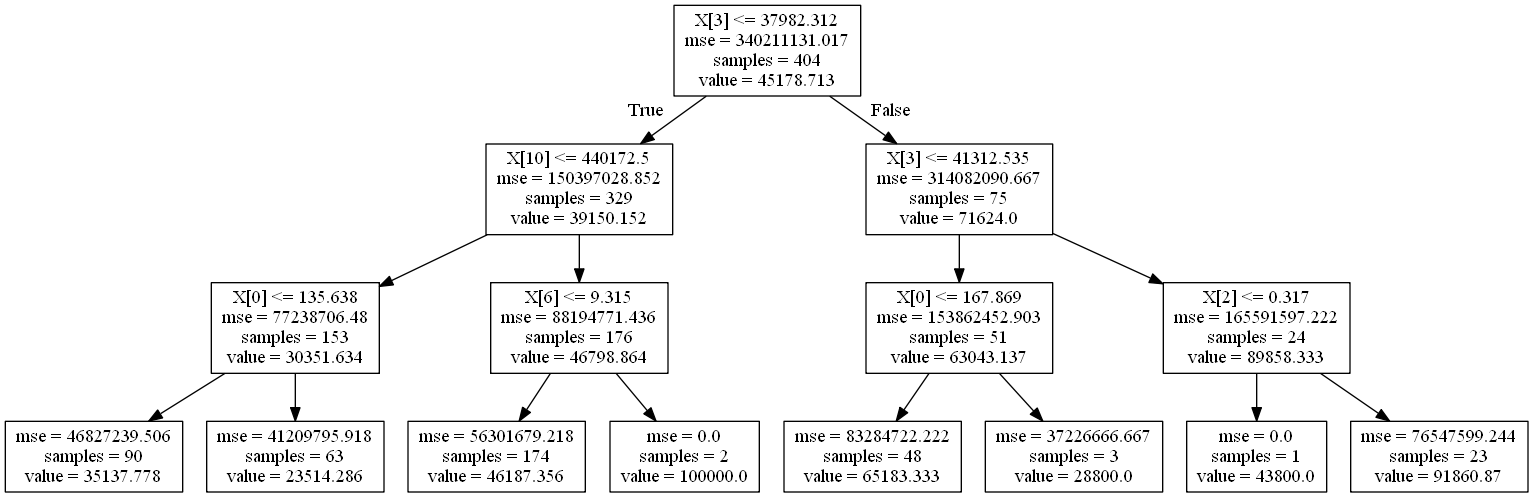

In [22]:
from IPython.display import Image
import pydotplus
import graphviz
gr = pydotplus.graph_from_dot_data(dot_data)
Image(gr.create_png())

Controlling tree growth

All the next options permit know how we can work with the decision trees, and according to each one we can choose the better model for our modelling in real cases

Maximum numbers of lebels

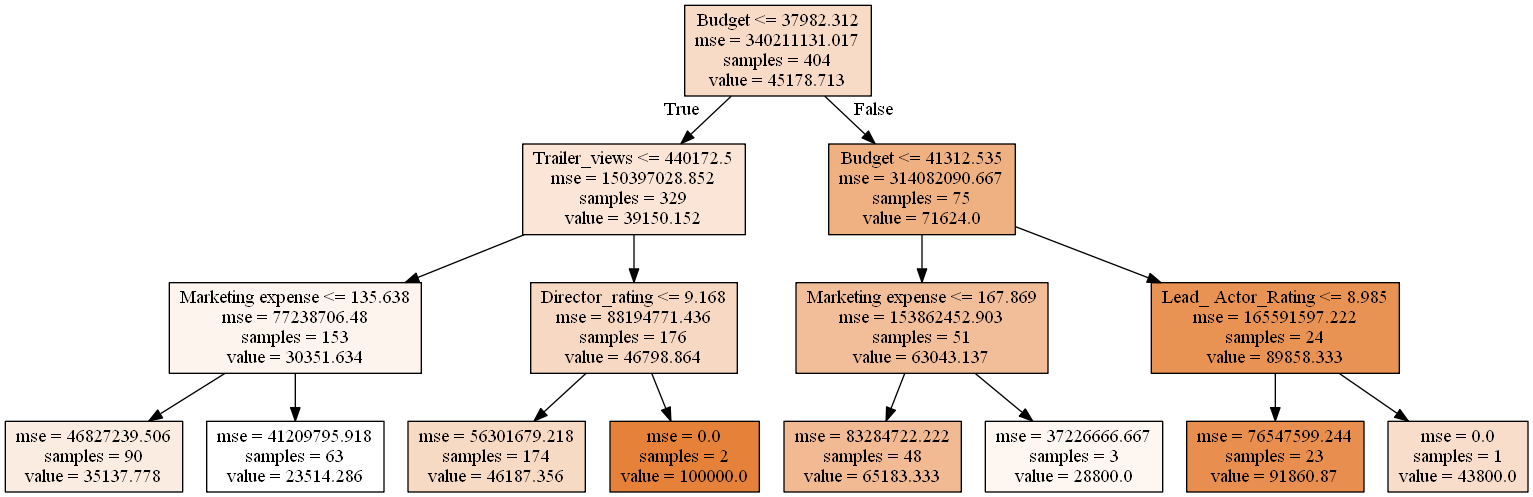

In [24]:
regtree1 = tree.DecisionTreeRegressor(max_depth = 3)
regtree1.fit(x_train, y_train)
dot_data1 = tree.export_graphviz(regtree1, out_file=None, feature_names = x_train.columns, filled = True)
gr1 = pydotplus.graph_from_dot_data(dot_data1)
Image(gr1.create_png())

Minimum observations at internal node

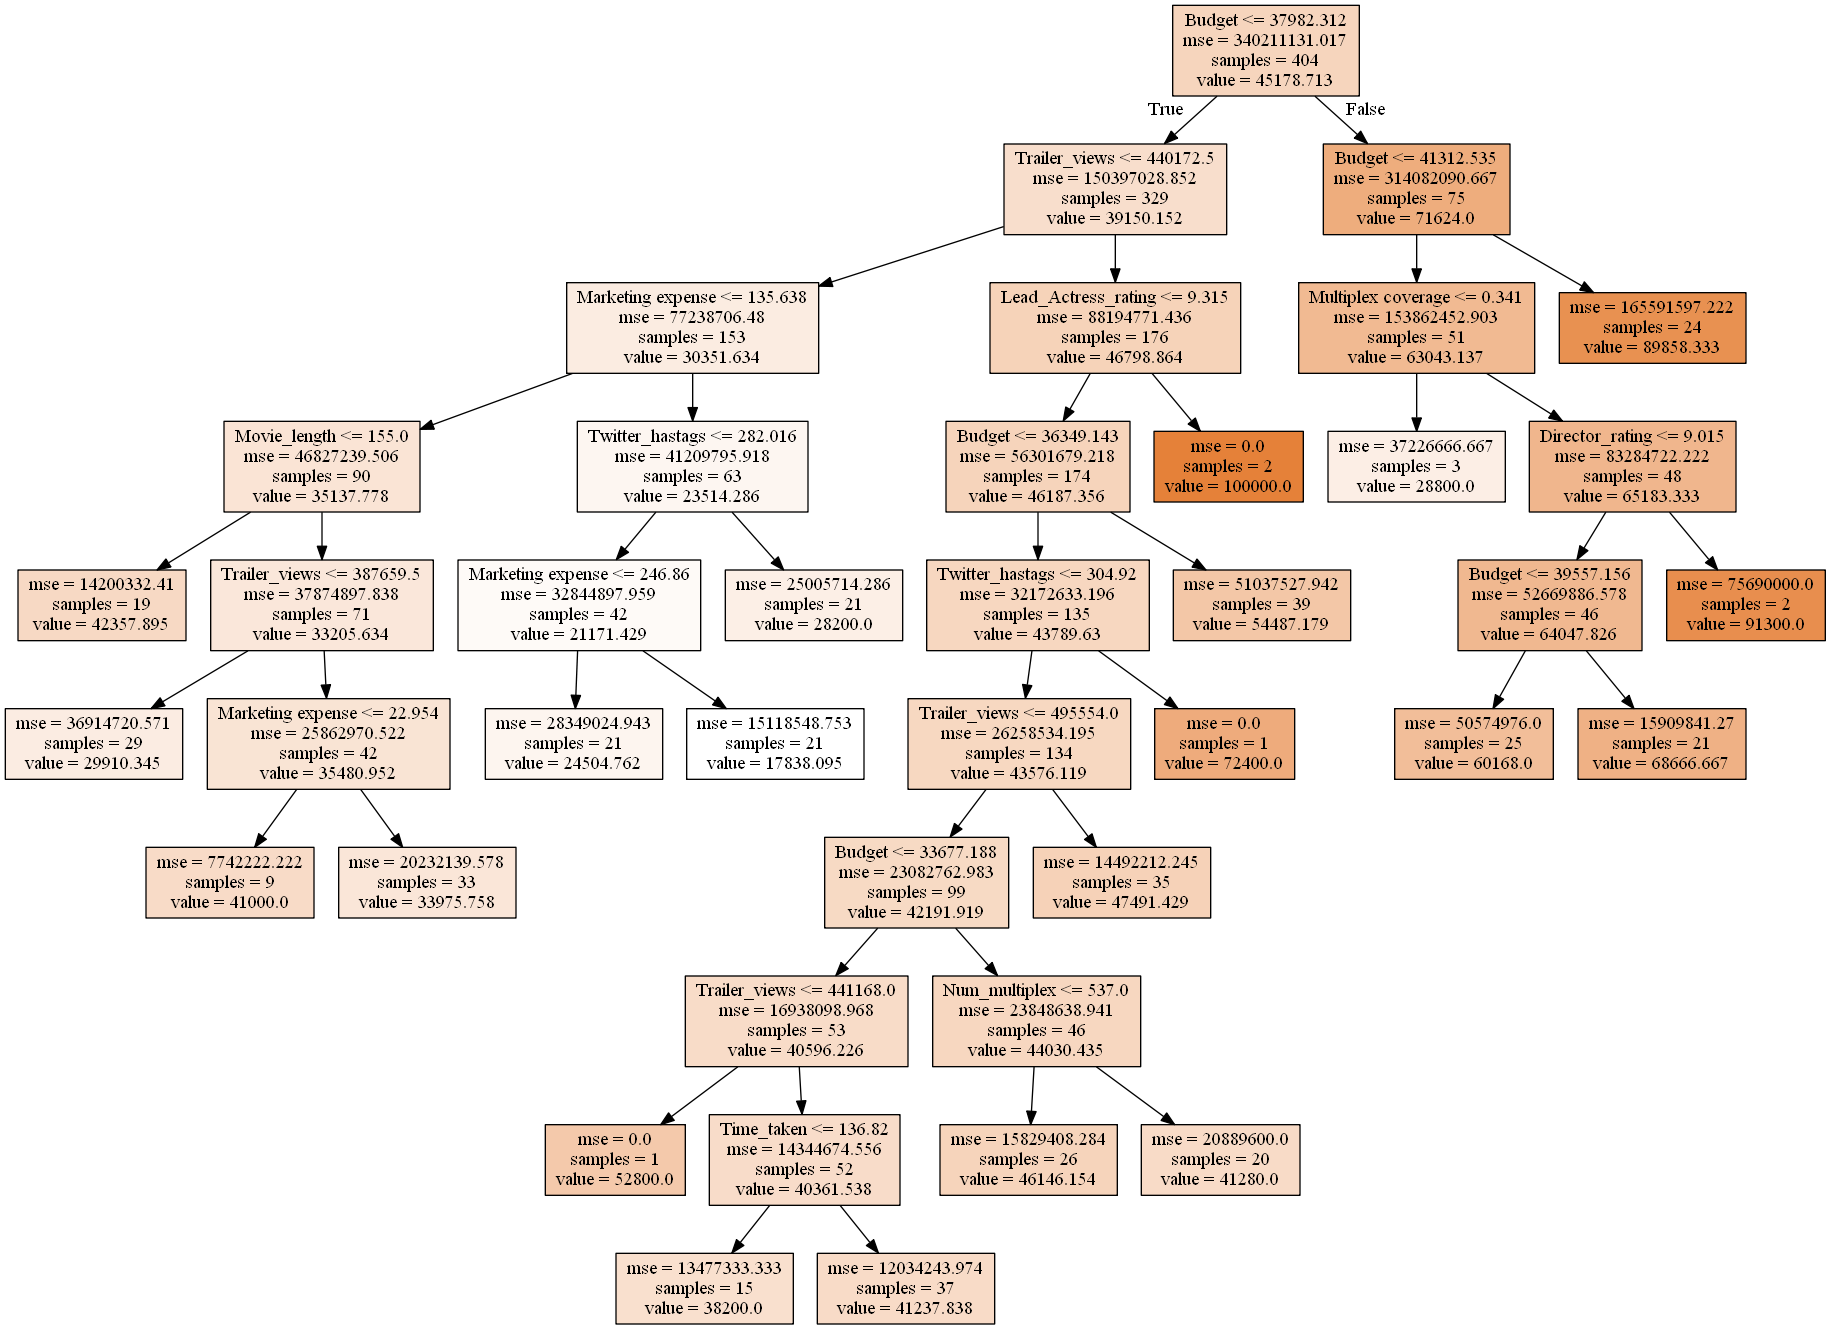

In [26]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split = 40)
regtree2.fit(x_train, y_train)
dot_data2 = tree.export_graphviz(regtree2, out_file=None, feature_names = x_train.columns, filled = True)
gr2 = pydotplus.graph_from_dot_data(dot_data2)
Image(gr2.create_png())

Minimun observations at leaf node

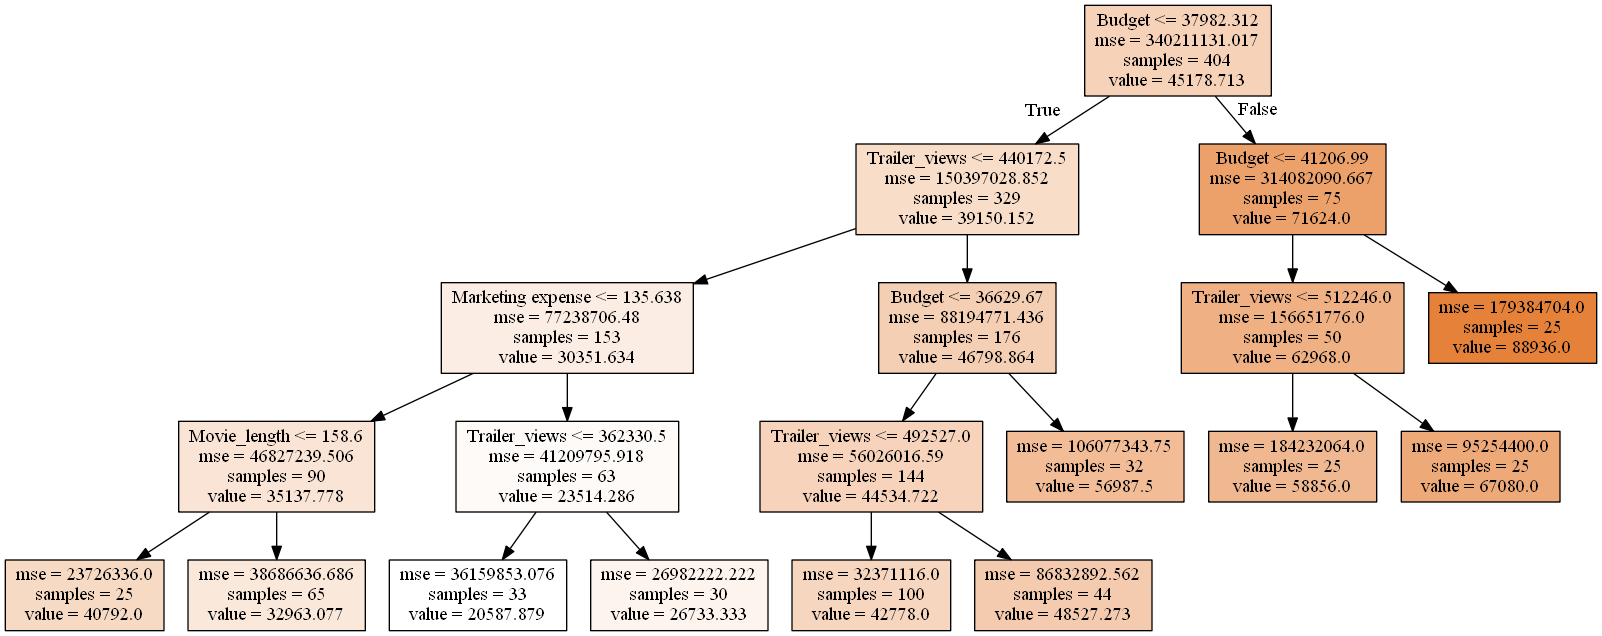

In [28]:
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf = 25, max_depth = 4)
regtree3.fit(x_train, y_train)
dot_data3 = tree.export_graphviz(regtree3, out_file=None, feature_names = x_train.columns, filled = True)
gr3 = pydotplus.graph_from_dot_data(dot_data3)
Image(gr3.create_png())